## EN2550 Assignment 1 
### 190484T - Rajapaksha R.M.P.A.P.

In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### Question 1

Text(0.5, 1.0, 'Transformed Image')

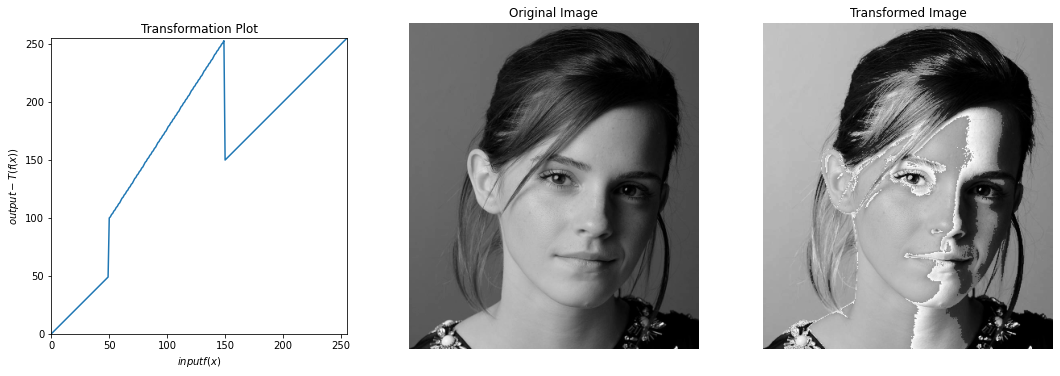

In [13]:
# ************************ question 1 **************************

# opening the image 
im = cv.imread("emma_gray.jpg", cv.IMREAD_REDUCED_GRAYSCALE_2)

# creating the transform 
t1 = np.arange(0, 50, 1)
t2 = np.arange(100, 255, 155/100)
t3 = np.arange(150, 255+1, 1)
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)

# perform the intensity transformation 
im_trans = cv.LUT(im, t)

# plotting the transform and visualizing images 
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
ax[0].plot(t)
ax[0].set_xlim(0, 255); ax[0].set_ylim(0, 255)
ax[0].set_xlabel("$input f(x)$"); ax[0].set_ylabel("$output - T(f(x))$")
ax[0].set_aspect("equal")
ax[0].set_title("Transformation Plot")

ax[1].imshow(im, cmap = 'gray')
ax[1].axis('off')
ax[1].set_title("Original Image")

ax[2].imshow(im_trans, cmap = 'gray')
ax[2].axis('off')
ax[2].set_title("Transformed Image")

### Question 2

The pixel intensity range for white and gray matter can be decided by using trackbars provided by OpenCV. 

Here, the pixel intensity range of [184, 255] is roughly occupied by white matter, and the range of [134, 180] is for gray matter.

Therefore, to accentuate a particular region, the other intensity values can be mapped to black. 

In [12]:
# # ************************ question 2 **************************

# # using trackbars to decide the range of pixel intensity for white and gray matter.
# def empty(arg): 
#     pass 

# im = cv.imread("brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
# cv.namedWindow("Original")
# cv.imshow("Original", im)

# cv.namedWindow("Trackbars")
# cv.resizeWindow("Trackbars", 300, 100)
# cv.createTrackbar("intensity min", "Trackbars", 0, 255, empty)
# cv.createTrackbar("pixel intensity max", "Trackbars", 255, 255, empty)

# while True:
#     intens_min = cv.getTrackbarPos("intensity min", "Trackbars")
#     intens_max = cv.getTrackbarPos("pixel intensity max", "Trackbars")

#     mask = cv.inRange(im, intens_min, intens_max)

#     cv.imshow("mask", mask)
#     cv.waitKey(10)
    

Text(0.5, 1.0, 'Gray Matter Accentuated')

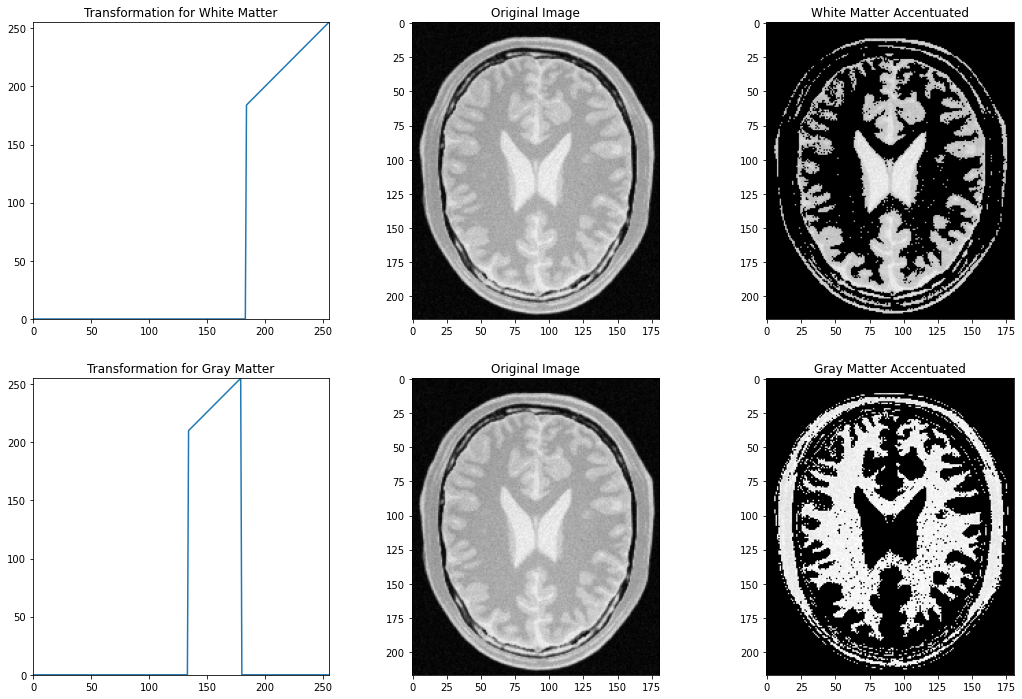

In [15]:
# intensity transformation for white matter 
arr = list(range(256))
for i in range(184): arr[i] = 0
t_w = np.array(arr)

# applying the transformation
white_matter = cv.LUT(im, t_w)

# intensity transformation for gray matter 
arr = list(range(256))
for i in range(134): arr[i] = 0
for i in range(134, 181): arr[i] += (256-180)
for i in range(181, 256): arr[i] = 0
t_g = np.array(arr).astype(np.uint8)

# applying the transformation
gray_matter = cv.LUT(im, t_g)

fig, ax = plt.subplots(2, 3, figsize = (18, 12))

ax[0, 0].plot(t_w); ax[0, 0].set_xlim(0, 255); ax[0, 0].set_ylim(0, 255)
ax[0, 0].set_title("Transformation for White Matter")
ax[0, 1].imshow(im, cmap='gray', vmin=0, vmax=255); 
ax[0, 1].set_title("Original Image")
ax[0, 2].imshow(white_matter, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title("White Matter Accentuated")

ax[1, 0].plot(t_g); ax[1, 0].set_xlim(0, 255); ax[1, 0].set_ylim(0, 255)
ax[1, 0].set_title("Transformation for Gray Matter")
ax[1, 1].imshow(im, cmap='gray', vmin=0, vmax=255); 
ax[1, 1].set_title("Original Image")
ax[1, 2].imshow(gray_matter, cmap='gray', vmin=0, vmax=255)
ax[1, 2].set_title("Gray Matter Accentuated")

### question 4

In [3]:
# creating the transformation function 
def customHistogramEqulization(image):
    # returns Histogram Equlized Version of an 8-bit grayscale image
    count = np.array([(im == p).sum() for p in range(256)])
    for i in range(1, 256): count[i] += count[i-1]
    t = ((256-1)/image.size * count).astype(np.uint8)

    hist_equalized = cv.LUT(image, t)
    return hist_equalized
    


(-0.5, 499.5, 499.5, -0.5)

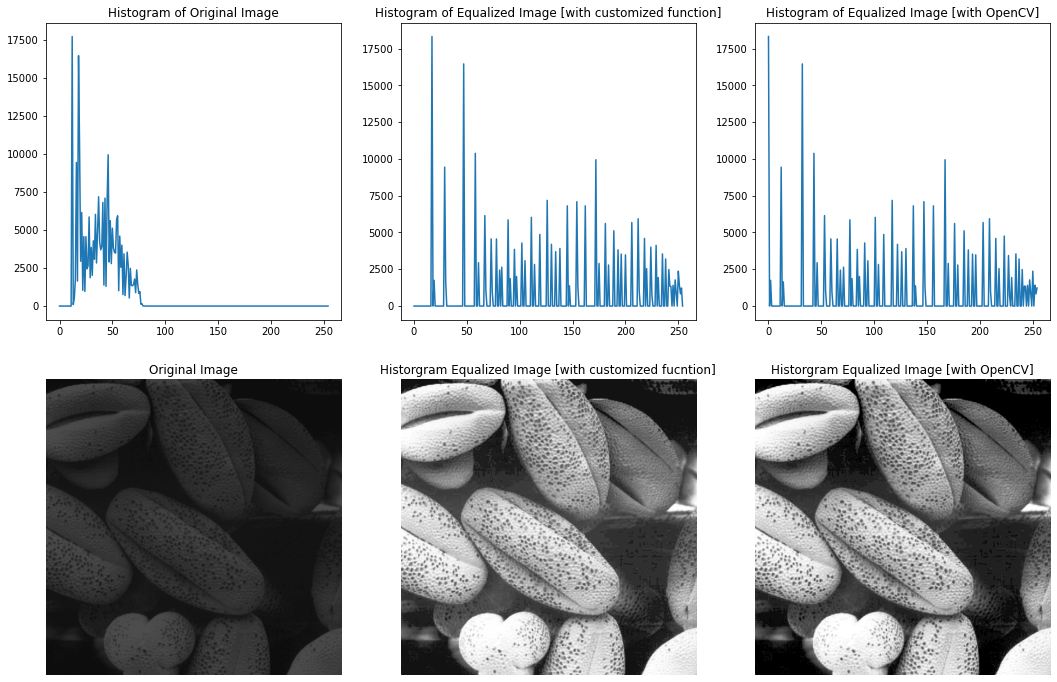

In [10]:
im = cv.imread("shells.png", cv.IMREAD_GRAYSCALE)
im_hist_equalized_custom = customHistogramEqulization(im) # using custom function
im_hist_equalized_cv = cv.equalizeHist(im)                # using opencv

hist_org = cv.calcHist([im], [0], None, [255], [0,256])
hist_equal_cust = cv.calcHist([im_hist_equalized_custom], [0], None, [255], [0,256])
hist_equal_cv = cv.calcHist([im_hist_equalized_cv], [0], None, [255], [0,256])

fig, ax = plt.subplots(2, 3, figsize=(18,12))

ax[0,0].plot(hist_org)
ax[0,0].set_title("Histogram of Original Image")

ax[0,1].plot(hist_equal_cust)
ax[0,1].set_title("Histogram of Equalized Image [with customized function]")

ax[0,2].plot(hist_equal_cv)
ax[0,2].set_title("Histogram of Equalized Image [with OpenCV]")

ax[1,0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title("Original Image")
ax[1,0].axis('off')

ax[1,1].imshow(im_hist_equalized_custom, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title("Historgram Equalized Image [with customized fucntion]")
ax[1,1].axis('off')

ax[1,2].imshow(im_hist_equalized_cv, cmap='gray', vmin=0, vmax=255)
ax[1,2].set_title("Historgram Equalized Image [with OpenCV]")
ax[1,2].axis('off')

## question 6

### part (a)

Text(0.5, 1.0, 'Sobel Filtered Image [with OpenCV]')

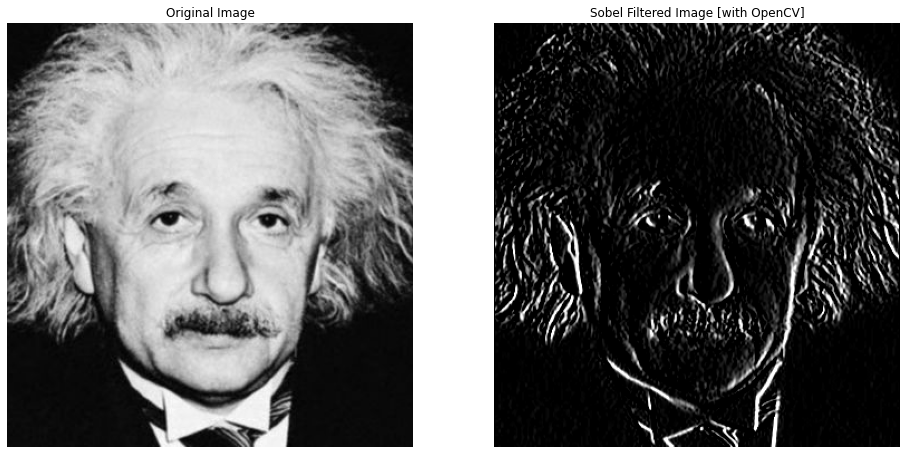

In [19]:
# opening the image
im = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)

# applying the veritcal sobel filter with OpenCV function "filter2D"
sobel_vert = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype = np.float32)
filtered_im = cv.filter2D(im, -1, sobel_vert)

# visulaizing the images
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
ax[0].imshow(im, cmap = 'gray')
ax[0].axis('off'); ax[0].set_title("Original Image")
ax[1].imshow(filtered_im, cmap = 'gray')
ax[1].axis('off'); ax[1].set_title("Sobel Filtered Image [with OpenCV]")

- In the above case, we do not necessarily have to set the `vmin` and `vmax` parameters in `filter2D` function to $-1020$ and $1020$ (as we did in the inclass activities). 
- Since the `ddepth` parameter is set to $-1$, the output image will have the same depth (i.e. same resolution) as the input image. 
- Therefore, the pixel value in the `filtered_im` is already in the range $[0, 255]$ (not from $-1020$ to $1020$). 

### part (b)

In [16]:
def customFilter(img, kernel):
    "return the sobel fitered image with the specified kernel"
    x, y = img.shape
    x_k, y_k = kernel.shape

    # perform zero padding 
    pad_tb = np.zeros((x_k//2, y)) 
    pad_lr = np.zeros((x+(x_k//2)*2, (y_k//2)))
    img_padded = np.concatenate((pad_tb, img, pad_tb), axis = 0)
    img_padded = np.concatenate((pad_lr, img_padded, pad_lr), axis = 1)

    img_filtered = np.zeros(img.shape)
    # computing correlation between image and the kernel (not convolution)
    for i in range(x):
        I = i + x_k//2
        for j in range(y):
            J = j + y_k//2
            window = img_padded[I-x_k//2:I+x_k//2+1, J-y_k//2:J+y_k//2+1]
            img_filtered[i, j] = np.sum(window*kernel)

    min = np.min(img_filtered)
    max = np.max(img_filtered)
    img_filtered -= min
    img_filtered *= (255/(max-min))
    img_filtered = img_filtered.astype(np.uint8)
    
    return img_filtered

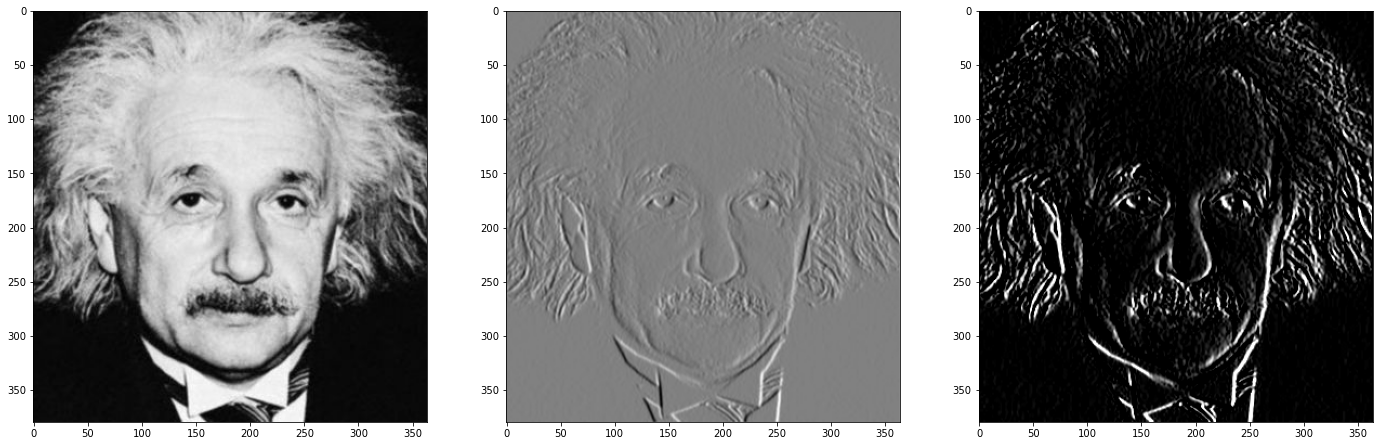

In [20]:
# generating the sobel filtered image using customFilter function 
custom_filtered_im = customFilter(im, sobel_vert)

# visualizing the images
fig, ax = plt.subplots(1, 3, figsize = (24, 8))
ax[0].imshow(im, cmap = 'gray')
ax[1].imshow(custom_filtered_im, cmap = 'gray')
ax[2].imshow(filtered_im, cmap = 'gray')

In [5]:
a = [[1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [8, 7, 6, 5], 
    [4, 3, 2, 1]]
b = [[0, 0, 0], 
    [0, 1, 0], 
    [0, 0, 0]]
a = np.array(a)
b = np.array(b)

z = [[0., 0., 0., 0.]]
z = np.array(z)
np.concatenate((z, a, z), axis = 0)


array([[0., 0., 0., 0.],
       [1., 2., 3., 4.],
       [5., 6., 7., 8.],
       [8., 7., 6., 5.],
       [4., 3., 2., 1.],
       [0., 0., 0., 0.]])

In [11]:
im = customFilter(a, b)

1 1 1.0
1 2 2.0
1 3 3.0
1 4 4.0
2 1 5.0
2 2 6.0
2 3 7.0
2 4 8.0
3 1 8.0
3 2 7.0
3 3 6.0
3 4 5.0
4 1 4.0
4 2 3.0
4 3 2.0
4 4 1.0


In [12]:
im

array([[  0,  36,  72, 109],
       [145, 182, 218, 255],
       [255, 218, 182, 145],
       [109,  72,  36,   0]], dtype=uint8)

In [90]:
Z = np.zeros(a.shape)
Z[1, 1] = 1.1
Z[1, 1]
Z.astype(np.uint8)

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [91]:
Z

array([[0. , 0. , 0. , 0. ],
       [0. , 1.1, 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ]])